# Cuadro grecolatino

Definiendo factores:

In [4]:
dias <- rep(c('l','m','mi','j','v'),times=5)
dias

[1] "l"  "m"  "mi" "j"  "v"  "l"  "m"  "mi" "j"  "v"  "l"  "m"  "mi" "j"  "v" 
[16] "l"  "m"  "mi" "j"  "v"  "l"  "m"  "mi" "j"  "v"

In [3]:
tienda <- rep(c(1:5),each=5)
tienda

[1] 1 1 1 1 1 2 2 2 2 2 3 3 3 3 3 4 4 4 4 4 5 5 5 5 5

In [6]:
altura <- c('$\alpha$','$\delta$','$\epsilon$','$\beta$','$\gamma$','$\delta$','$\beta$','$\gamma$','$\epsilon$','$\alpha$','$\gamma$','$\alpha$','$\beta$','$\delta$','$\epsilon$','$\epsilon$','$\gamma$','$\delta$','$\alpha$','$\beta$','$\beta$','$\epsilon$','$\alpha$','$\gamma$','$\delta$')

ERROR: Error: '\d' is an unrecognized escape in character string starting "'$\d"


In [14]:
c('alpha','delta','epsilon','beta','gamma','delta','beta','gamma','epsilon','alpha','gamma','alpha','beta','delta','epsilon','epsilon','gamma','delta','alpha','beta')

[1] "alpha"   "delta"   "epsilon" "beta"    "gamma"   "delta"   "beta"   
 [8] "gamma"   "epsilon" "alpha"   "gamma"   "alpha"   "beta"    "delta"  
[15] "epsilon" "epsilon" "gamma"   "delta"   "alpha"   "beta"

Vamos a trabajar con el archivo .csv para que no haya errores, lo de arriba fue sólo para mostrar cómo se hace la base a mano.

In [15]:
datos = read.csv('/home/lorena/Escritorio/Estadistica aplicada y R/Literatura/Cuadro latino/Cuadro grecolatino/base_de_datos.csv')

Se declaran los factores como categóricos, y definiendo la variable respuesta.

In [25]:
dias <- as.factor(datos$dia)
tienda <- as.factor(datos$tienda)
altura <- as.factor(datos$altura)
trat <- as.factor(datos$trat)
y <- datos$y

Comprobando que la variable respuesta **y** es numérica:

In [26]:
is.numeric(y)

[1] TRUE

## Creando el modelo 

In [27]:
m1 <- lm(y ~ trat+dias+tienda+altura)

##  Análisis de la varianza del modelo

In [28]:
anova(m1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
trat,4,115462.16,28865.54,31.2147631,6.256394e-05
dias,4,6138.56,1534.64,1.6595367,2.510319e-01
tienda,4,1544.96,386.24,0.4176742,7.919202e-01
altura,4,8852.16,2213.04,2.3931483,1.365541e-01
Residuals,8,7397.92,924.74,NA,NA


Aquí se observa que el valor de $p$ es menor a 0.05 sólo para el tratamiento, por lo que el resto de los factores: día, tienda y altura, no son estadísticamente significativos.

## Comparaciones múltiples con prueba de Tukey

In [30]:
TukeyHSD(aov(y ~ trat+dias+tienda+altura),'trat')

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = y ~ trat + dias + tienda + altura)

$trat
     diff         lwr      upr     p adj
B-A 109.4   42.955898 175.8441 0.0030451
C-A 145.0   78.555898 211.4441 0.0004580
D-A  59.6   -6.844102 126.0441 0.0813035
E-A 196.8  130.355898 263.2441 0.0000502
C-B  35.6  -30.844102 102.0441 0.4101358
D-B -49.8 -116.244102  16.6441 0.1624912
E-B  87.4   20.955898 153.8441 0.0119182
D-C -85.4 -151.844102 -18.9559 0.0135959
E-C  51.8  -14.644102 118.2441 0.1412942
E-D 137.2   70.755898 203.6441 0.0006730


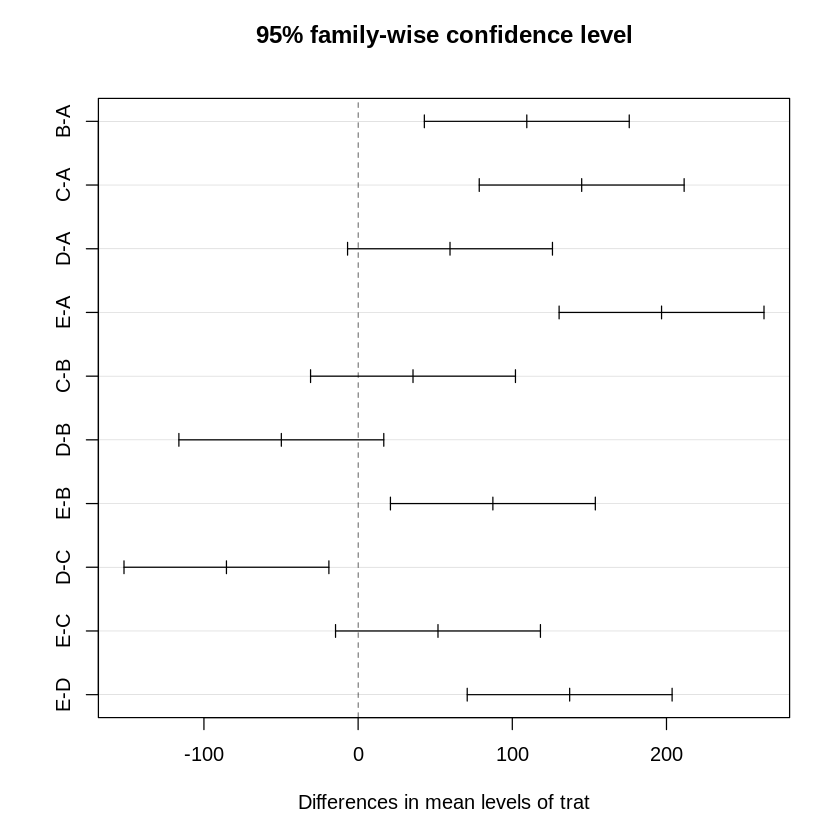

In [31]:
plot(TukeyHSD(aov(y ~ trat+dias+tienda+altura),'trat'))

## Comparación con intervalos de confianza

In [32]:
medias <- tapply(y,trat,mean)
medias

A     B     C     D     E 
 70.2 179.6 215.2 129.8 267.0

In [33]:
ordenando <- sort(medias)
ordenando

A     D     B     C     E 
 70.2 129.8 179.6 215.2 267.0

In [34]:
ybar <- tapply(y,trat,mean)
ybar

A     B     C     D     E 
 70.2 179.6 215.2 129.8 267.0

In [35]:
n <- tapply(y,trat,length)
n

A B C D E 
5 5 5 5 5

### Cuadrados medios del error

In [36]:
CME <- anova(m1)["Residuals", "Mean Sq"]
CME

[1] 924.74

### Error estándar de las medias 

In [37]:
sem <- sqrt(CME/n)
sem

A        B        C        D        E 
13.59956 13.59956 13.59956 13.59956 13.59956

### Calculando el cuantil 

In [38]:
gle <- anova(m1)["Residuals", "Df"]
gle

[1] 8

In [39]:
cuantil <- qt(0.975,gle)
cuantil

[1] 2.306004

### Gráfica 

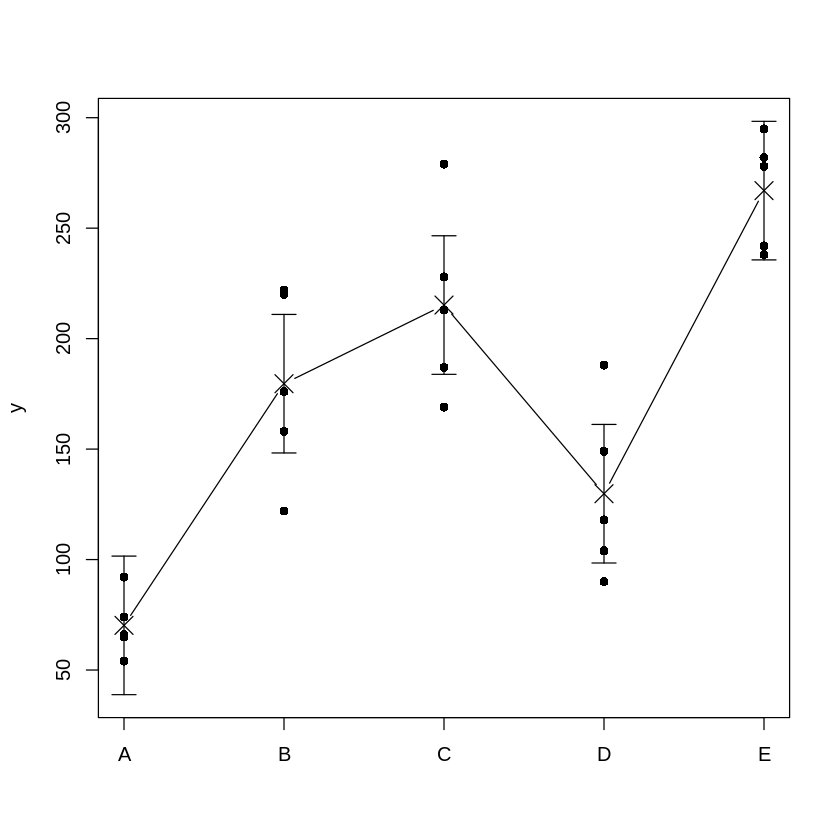

In [41]:
yaxis = c(min(medias-cuantil*sem),max(medias+cuantil*sem))
plot.new()
stripchart(y~trat,pch=16,vert=T,ylim=yaxis)
arrows(1:5,medias+cuantil*sem,1:5,medias-cuantil*sem,angle=90,code=3,length=.1)
lines(1:5,medias,pch=4,type="b",cex=2)

## Diagnóstico del modelo 

### Análisis de residuos 

In [42]:
residuos<-m1$res
residuos
estimados<-m1$fitt
estimados

1      2      3      4      5      6      7      8      9     10     11 
-17.92  11.88   2.28   2.68   1.08  -2.52  17.08  26.68 -21.32 -19.92 -12.12 
    12     13     14     15     16     17     18     19     20     21     22 
 24.88 -33.92   5.88  15.28  28.48 -29.12  -8.72  -0.72  10.08   4.08 -24.72 
    23     24     25 
 13.68  13.48  -6.52

1      2      3      4      5      6      7      8      9     10     11 
255.92 137.12 219.72 184.32  63.92 230.52 202.92 268.32  87.32 137.92 170.12 
    12     13     14     15     16     17     18     19     20     21     22 
 67.12 137.92 236.12 263.72 159.52 198.12  62.72 122.72 267.92  69.92 306.72 
    23     24     25 
199.32  76.52 182.52

## Probando normalidad de los errores

### Histograma de los residuos 

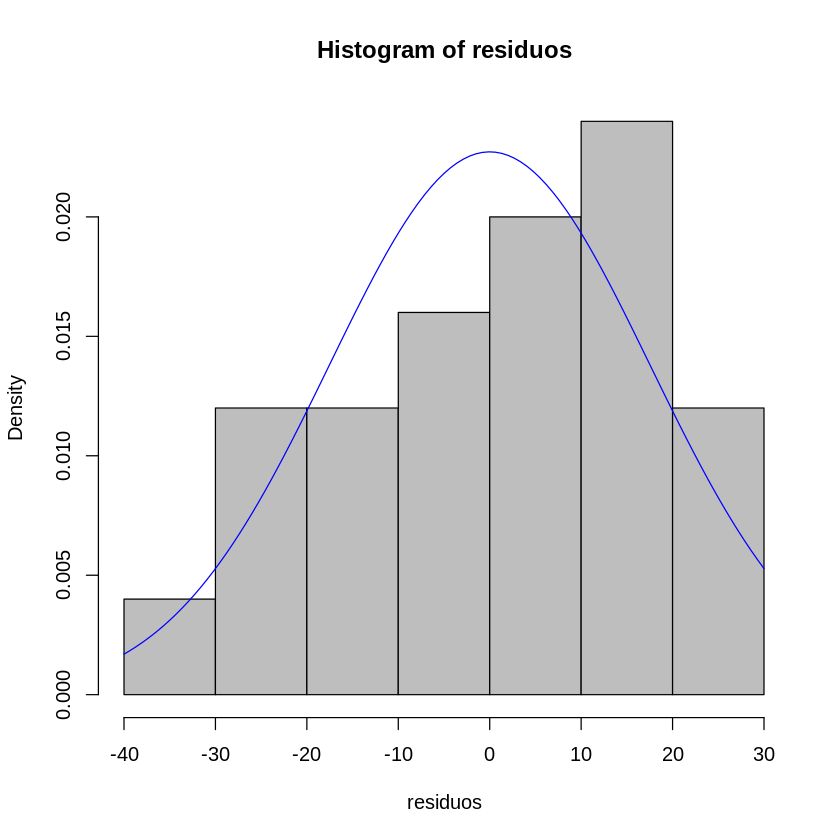

In [43]:
hist(residuos, prob=T, col="gray")
x=residuos
m<-mean(x)
s<-sd(x)
curve(dnorm(x,mean=m,sd=s), col="blue", add=TRUE)

## Diagrama de caja 

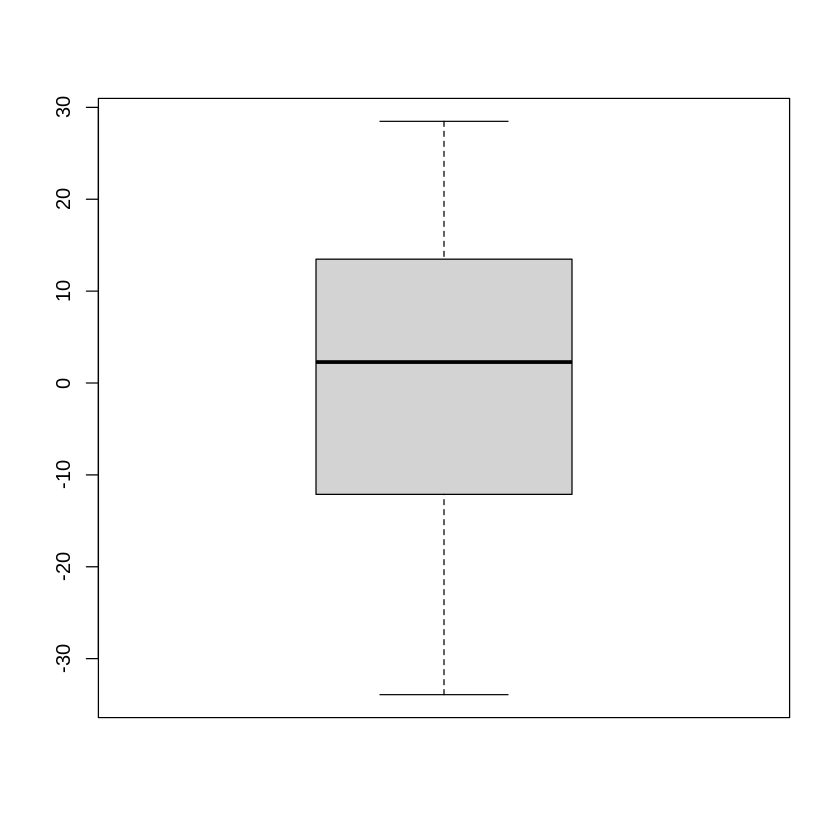

In [44]:
boxplot(residuos)

## Gráfica normal 

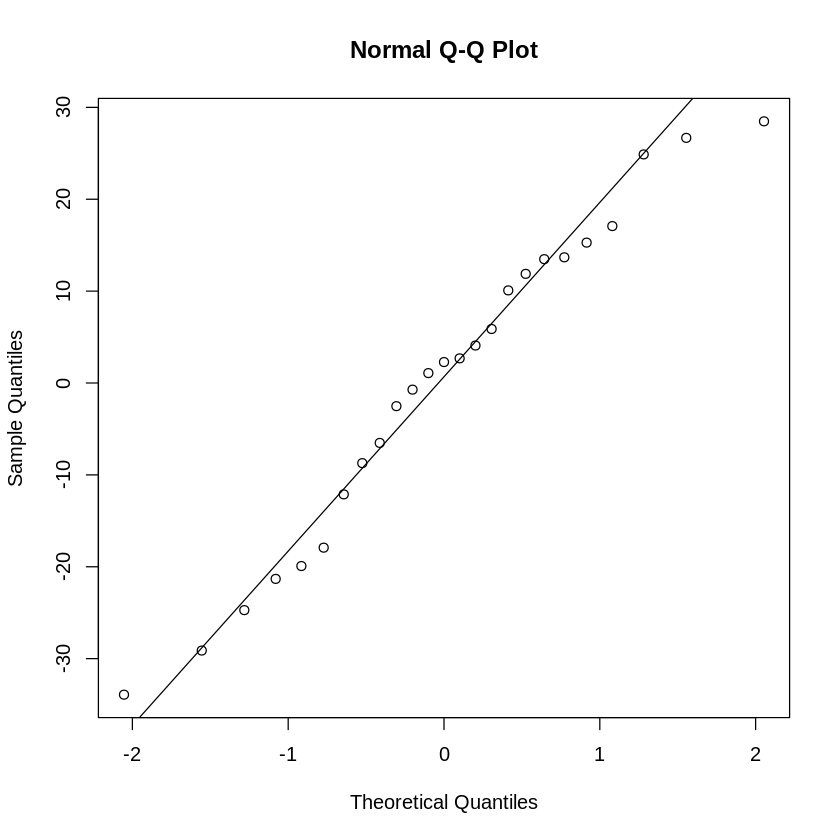

In [45]:
qqnorm(residuos)
qqline(residuos)

## Prueba de normalidad 

* Los datos(residuos) se ajustan a una distribución normal  vs 
* Ha: Los datos(residuos) no se ajustan a una distribución normal.

In [46]:
shapiro.test(residuos)


	Shapiro-Wilk normality test

data:  residuos
W = 0.9686, p-value = 0.6098


El valor de $p$ es mayor a 0.05, eso quiere decir que no se rechaza la hipótesis nula, es decir, los residuos se ajustan a una distribución normal.

Probando la independencia de los errores:

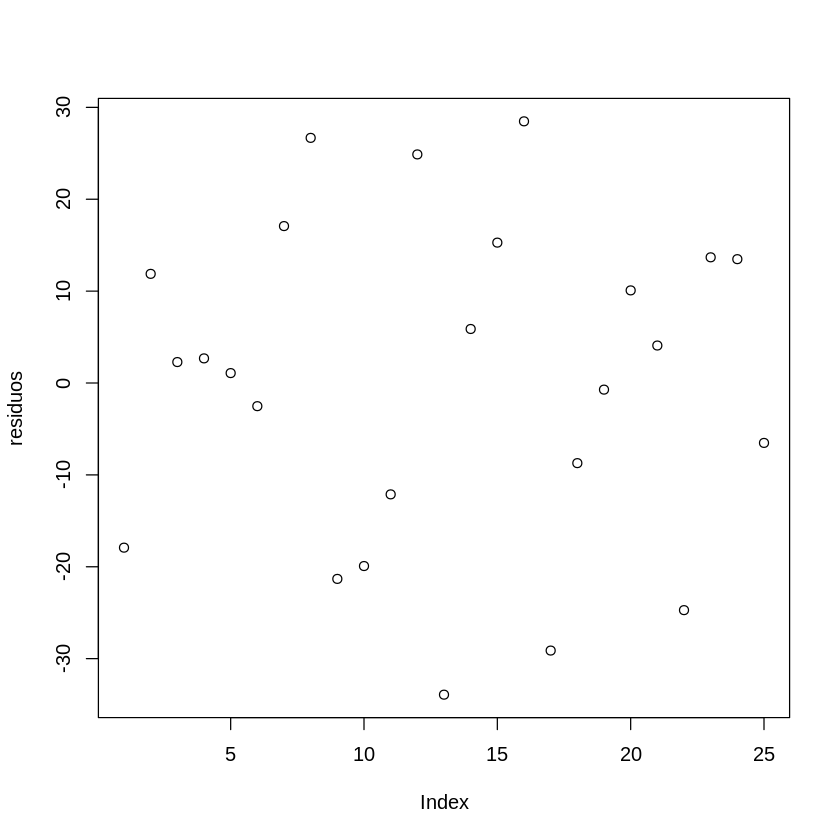

In [47]:
plot(residuos)

## Probando la autocorrelación de los datos 

In [ ]:
library(tseries)

* La prueba de rachas se utiliza para probar autocorrelación de datos.
* Prueba que el signo de los datos es aleatorio:
    * Ho: No hay correlacion vs Ha: Sí hay correlación

In [49]:
runs.test(as.factor(m1$residual<0))


	Runs Test

data:  as.factor(m1$residual < 0)
Standard Normal = -0.13275, p-value = 0.8944
alternative hypothesis: two.sided


Dado el valor de $p$, se observa que no se rechaza la hipótesis nula, por lo que no hay correlación de los datos.

## Probando la homogeneidad de la varianza: 

### Gráfica de residuos vs estimados

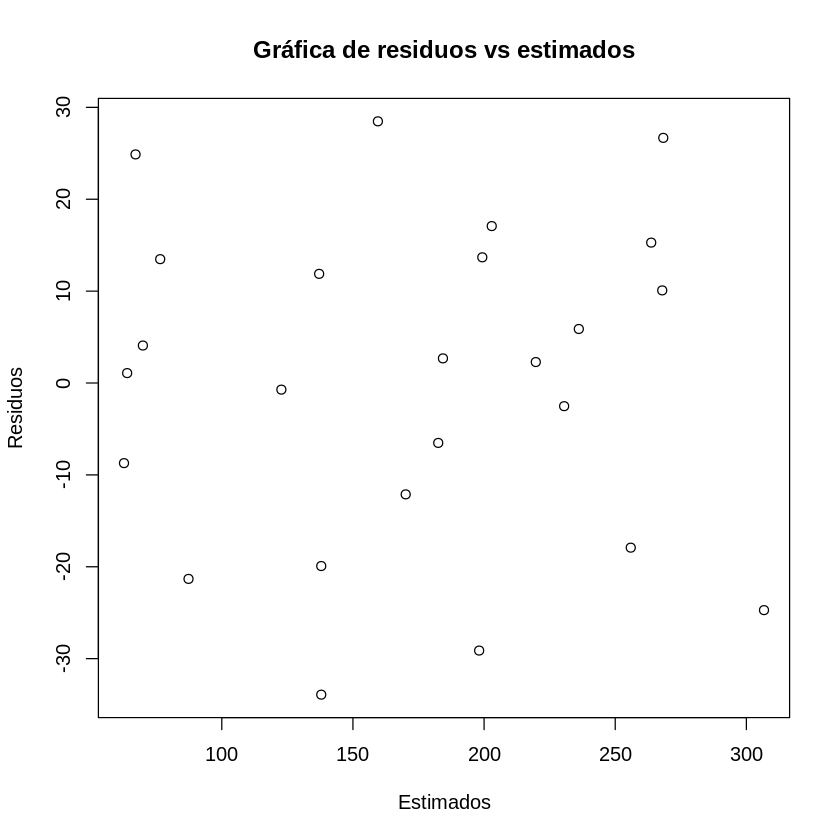

In [50]:
plot(estimados,residuos,xlab="Estimados",ylab="Residuos",main="Gráfica de residuos vs estimados")

## Prueba de homogeneidad de varianza, (homocedasticidad) 

* Ho: las varianzas de los tratamientos son homogéneas vs 
* Ha: las varianzas de los trat. no son Homogéneas.

In [51]:
bartlett.test(residuos,trat)


	Bartlett test of homogeneity of variances

data:  residuos and trat
Bartlett's K-squared = 2.59, df = 4, p-value = 0.6286


No se rechaza la hipótesis nula, por lo que las varianzas de los residuos son homogéneas.

In [ ]:
library(agricolae)
library(foreign)
library(multcomp)
library(LSD)

### Prueba de Duncan

In [54]:
model<-aov(y ~ trat+dias+tienda+altura)
out <- duncan.test(model,"trat",main="Metodos de ensamblado")

In [55]:
duncan.test(model,"trat",alpha=0.05,console=TRUE)


Study: model ~ "trat"

Duncan's new multiple range test
for y 

Mean Square Error:  924.74 

trat,  means

      y      std r Min Max
A  70.2 14.11382 5  54  92
B 179.6 42.50647 5 122 222
C 215.2 42.33438 5 169 279
D 129.8 39.19439 5  90 188
E 267.0 25.47548 5 238 295

Alpha: 0.05 ; DF Error: 8 

Critical Range
       2        3        4        5 
44.35064 46.21756 47.26106 47.88668 

Means with the same letter are not significantly different.

      y groups
E 267.0      a
C 215.2      b
B 179.6      b
D 129.8      c
A  70.2      d


Aquí se muestra los tratamientos C y B pertenecen al mismo grupo.

### Prueba se Scheffe 

In [57]:
comparison <- scheffe.test(model,"trat", group=TRUE,console=TRUE,main="metodos")


Study: metodos

Scheffe Test for y 

Mean Square Error  : 924.74 

trat,  means

      y      std r Min Max
A  70.2 14.11382 5  54  92
B 179.6 42.50647 5 122 222
C 215.2 42.33438 5 169 279
D 129.8 39.19439 5  90 188
E 267.0 25.47548 5 238 295

Alpha: 0.05 ; DF Error: 8 
Critical Value of F: 3.837853 

Minimum Significant Difference: 75.35533 

Means with the same letter are not significantly different.

      y groups
E 267.0      a
C 215.2     ab
B 179.6     bc
D 129.8     cd
A  70.2      d


Con este método, el tratamiento E y C pertenecen al mismo grupo, el C y B pertenecen a otro, B y D pertencen a un grupo más, y el tratamiento A está en un grupo solo.

**En conclusión**: todos los supuestos del modelo se cumplen. Además, el día, la tienda y la altura no fueron significativos. Sin embargo, el tipo de envoltura sí afecta a la ventas, las que más venden son la E y C, y la de que menos venden son las A y D, por lo que es mejor retirar esas dos últimas envolturas de las tiendas.